In [141]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import itertools

In [142]:
#define commonly used stuff
cur_dir = "C:/Users/Sriram/Desktop/data/"

subfolders = [f.path for f in os.scandir(cur_dir) if f.is_dir()] #in case we weant a pass through everyhting

threadstats = "threadstats_"
thread = "thread.csv"
iterate = "-iterate.txt"

#ALL THE POSSIBLE OPTIONS
samp_coord = ["1k-1k-", "1k-10k-", "10k-1k-"]
sparsities = ["0005-r", "0010-r", "0200-r", "1000-r"]

hw = "hogwild_linearregression_"
es = "exampleshared_linearregression_"
ei = "exampleindependent_linearregression_"
sh = "segmentedhogwild_linearregression_"
algos = [hw, es, ei, sh]

#define important quantities
num_threads = 36
num_samps = 100

#Define markers for plots
markers = itertools.cycle((',', '+', '.', 'o', '*', '^', 'x')) 

In [143]:
#DEFINE THE CURRENT PARAMETERS - FOR TESTING
SAMPS = samp_coord[0]
SPARSITY = sparsities[0]

folder = SAMPS + SPARSITY

In [144]:
#give the filename of a log_#iterates.csv file to read and return iteration info and timestamps
def get_threadstats_data(fname):
    df = pd.read_csv(fname)
    time = df.iloc[0,1].astype(float)
    
    return time

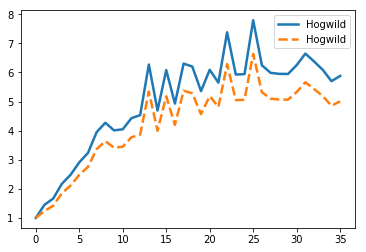

In [145]:
init_hw = get_threadstats_data(cur_dir + hw + folder + "/" + threadstats + str(1) + thread)
init_sh = get_threadstats_data(cur_dir + sh + folder + "/" + threadstats + str(1) + thread)
speedup_hw = np.zeros(num_threads)
speedup_sh = np.zeros(num_threads)
speedup_hw[0] = 1
speedup_sh[0] = 1

#iterate from 2 to 36 and calculate speedup over 1 thread
for i in range(2, num_threads + 1):
    thread_time = get_threadstats_data(cur_dir + algo + folder + "/" + threadstats + str(i) + thread)
    speedup_hw[i-1] = init_hw/thread_time
    
for i in range(2, num_threads + 1):
    thread_time = get_threadstats_data(cur_dir + algo + folder + "/" + threadstats + str(i) + thread)
    speedup_sh[i-1] = init_sh/thread_time

plt.figure()
plt.plot(range(num_threads), speedup_hw, linewidth=2.5, label = "Hogwild")
plt.plot(range(num_threads), speedup_sh, linestyle='dashed', linewidth=2.5, label = "Hogwild")
plt.legend()
plt.show()

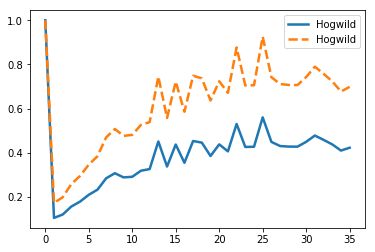

In [146]:
init_ei = get_threadstats_data(cur_dir + ei + folder + "/" + threadstats + str(1) + thread)
init_es = get_threadstats_data(cur_dir + es + folder + "/" + threadstats + str(1) + thread)
speedup_ei = np.zeros(num_threads)
speedup_es = np.zeros(num_threads)
speedup_ei[0] = 1
speedup_es[0] = 1

#iterate from 2 to 36 and calculate speedup over 1 thread
for i in range(2, num_threads + 1):
    thread_time = get_threadstats_data(cur_dir + algo + folder + "/" + threadstats + str(i) + thread)
    speedup_ei[i-1] = init_ei/thread_time
    
for i in range(2, num_threads + 1):
    thread_time = get_threadstats_data(cur_dir + algo + folder + "/" + threadstats + str(i) + thread)
    speedup_es[i-1] = init_es/thread_time

plt.figure()
plt.plot(range(num_threads), speedup_ei, linewidth=2.5, label = "Hogwild")
plt.plot(range(num_threads), speedup_es, linestyle='dashed', linewidth=2.5, label = "Hogwild")
plt.legend()
plt.show()